In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Número de observaciones
n = 1000

# Variables explicativas
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(5, 2, n)

# Parámetros de la distribución binomial negativa
r = 2   # Número de éxitos
p = 0.5 # Probabilidad de éxito

# Generar la variable dependiente con una proporción de ceros añadidos
mu = np.exp(1 + 0.5 * X1 + 0.3 * X2)  # Media esperada de la distribución
size = r
prob = size / (size + mu)

# Generar los datos binomiales negativos
Y_nonzero = nbinom.rvs(size, prob, size=n)

# Introducir un exceso de ceros
zero_inflation = 0.3
Y = np.where(np.random.rand(n) < zero_inflation, 0, Y_nonzero)

# Crear el DataFrame
data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2})

# Mostrar las primeras filas del DataFrame
print(data.head())


    Y        X1        X2
0   0  0.496714  7.798711
1   0 -0.138264  6.849267
2  17  0.647689  5.119261
3   8  1.523030  3.706126
4   4 -0.234153  6.396447


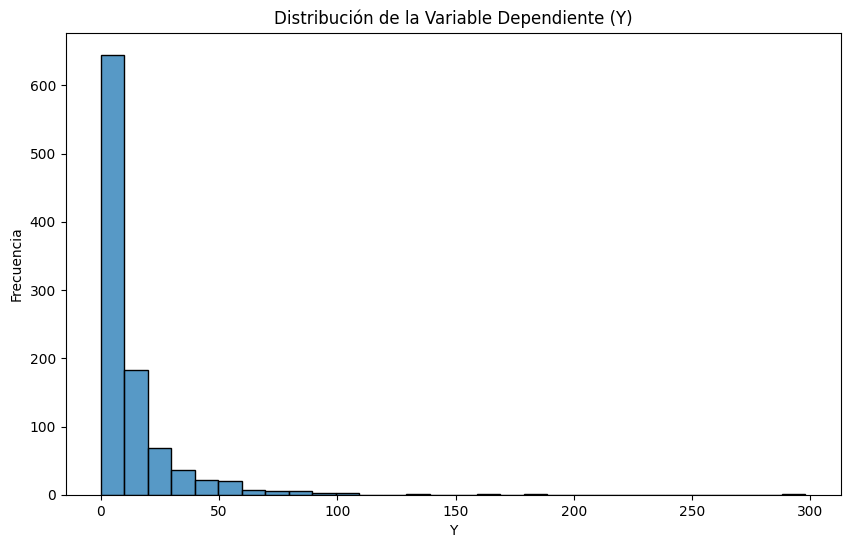

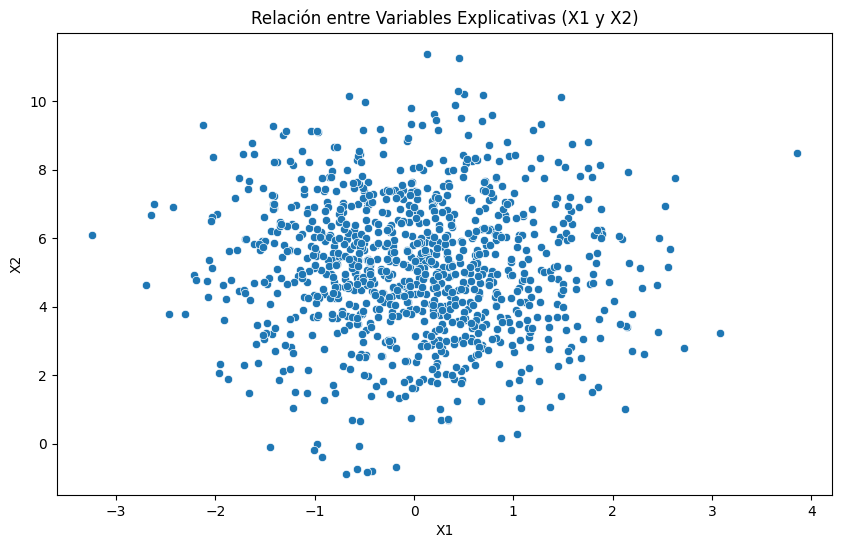

   VIF Factor features
0    0.869276    const
1    0.000632       X1
2    0.000632       X2
Proporción de ceros en Y: 31.50%


In [3]:
# Verificación de la distribución de la variable dependiente
plt.figure(figsize=(10, 6))
sns.histplot(data['Y'], bins=30, kde=False)
plt.title('Distribución de la Variable Dependiente (Y)')
plt.xlabel('Y')
plt.ylabel('Frecuencia')
plt.show()

# Verificación de la independencia de las variables explicativas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X1', y='X2', data=data)
plt.title('Relación entre Variables Explicativas (X1 y X2)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Verificación de multicolinealidad
import statsmodels.api as sm

X = data[['X1', 'X2']]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [sm.OLS(X[col], X.drop(columns=col)).fit().rsquared_adj for col in X]
vif["features"] = X.columns
print(vif)

# Proporción de ceros en la variable dependiente
zero_proportion = (data['Y'] == 0).mean()
print(f'Proporción de ceros en Y: {zero_proportion:.2%}')


Prueba de Shapiro-Wilk para X1: Estadístico=0.9986092190571166, p-valor=0.6272578290249117
Prueba de Shapiro-Wilk para X2: Estadístico=0.9987638229737376, p-valor=0.7311929770364404
Correlación entre X1 y Y: 0.2573737818928078
Correlación entre X2 y Y: 0.35036903703893785


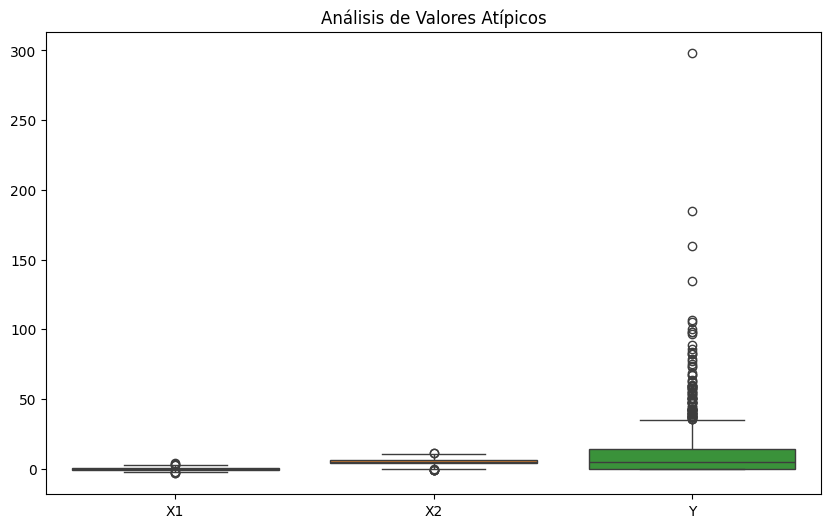

Prueba de Breusch-Pagan para heterocedasticidad: LM-Stat=66.61086624110769, p-valor=3.4326867869614746e-15


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom, shapiro, pearsonr
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de normalidad para las variables explicativas
shapiro_X1 = shapiro(data['X1'])
shapiro_X2 = shapiro(data['X2'])
print(f'Prueba de Shapiro-Wilk para X1: Estadístico={shapiro_X1.statistic}, p-valor={shapiro_X1.pvalue}')
print(f'Prueba de Shapiro-Wilk para X2: Estadístico={shapiro_X2.statistic}, p-valor={shapiro_X2.pvalue}')

# Análisis de correlación entre variables explicativas y la variable dependiente
corr_X1_Y, _ = pearsonr(data['X1'], data['Y'])
corr_X2_Y, _ = pearsonr(data['X2'], data['Y'])
print(f'Correlación entre X1 y Y: {corr_X1_Y}')
print(f'Correlación entre X2 y Y: {corr_X2_Y}')

# Análisis de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['X1', 'X2', 'Y']])
plt.title('Análisis de Valores Atípicos')
plt.show()

# Prueba de heterocedasticidad
lm_test = het_breuschpagan(data['Y'], X)
print(f'Prueba de Breusch-Pagan para heterocedasticidad: LM-Stat={lm_test[0]}, p-valor={lm_test[1]}')


<Figure size 1000x600 with 0 Axes>

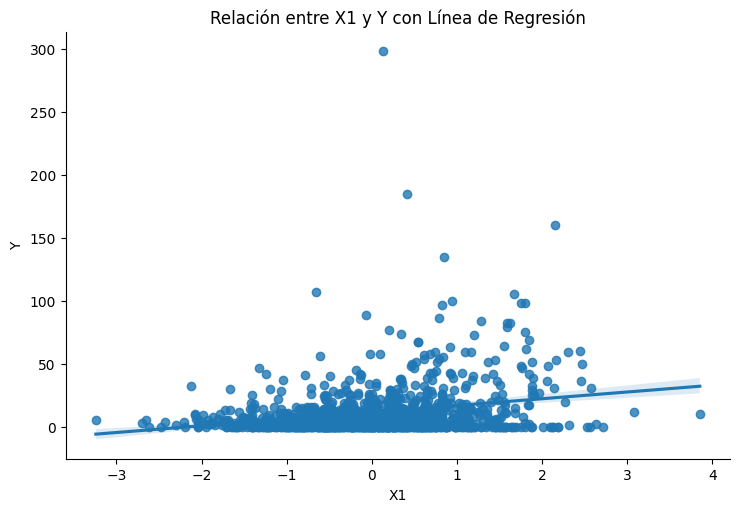

<Figure size 1000x600 with 0 Axes>

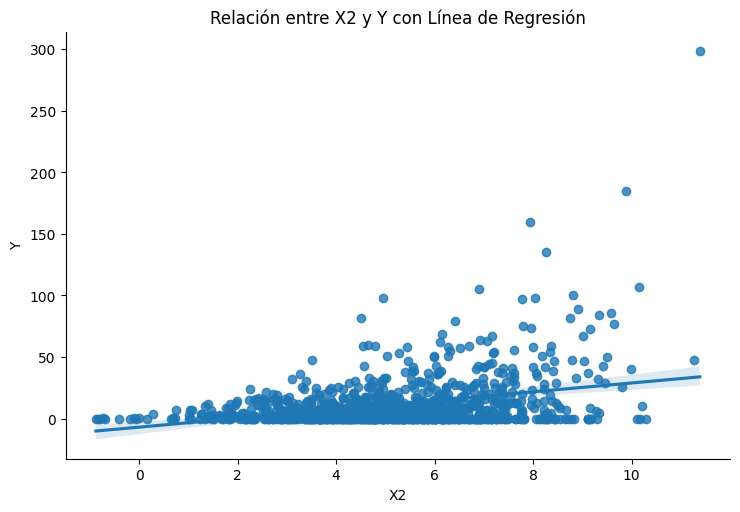

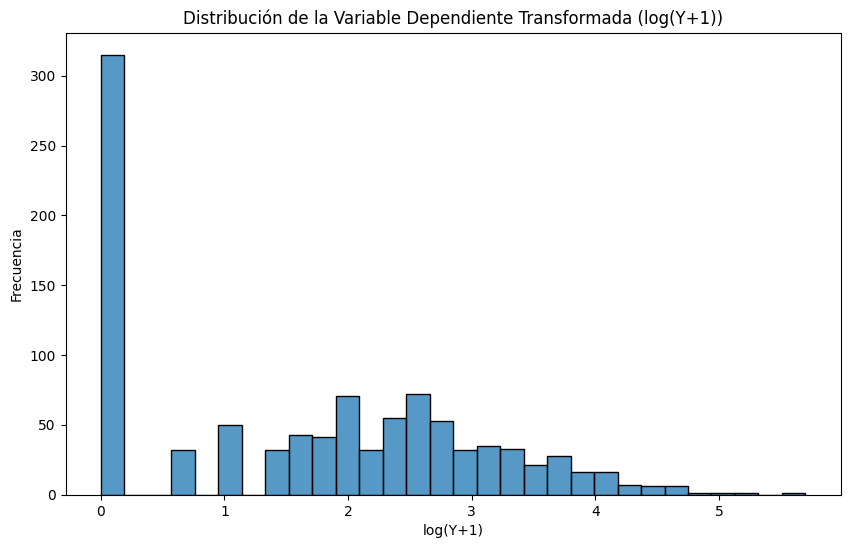

Dispersión de Y: 35.814657354716324


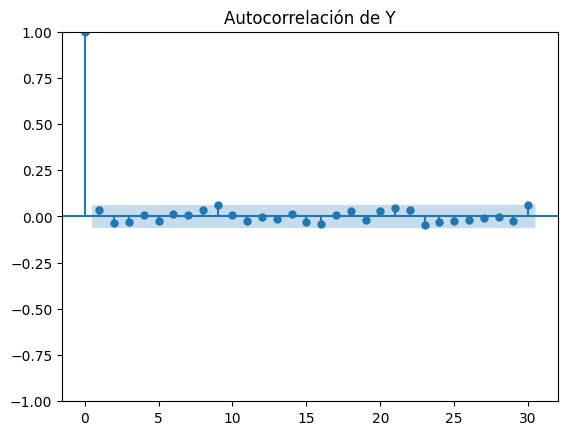

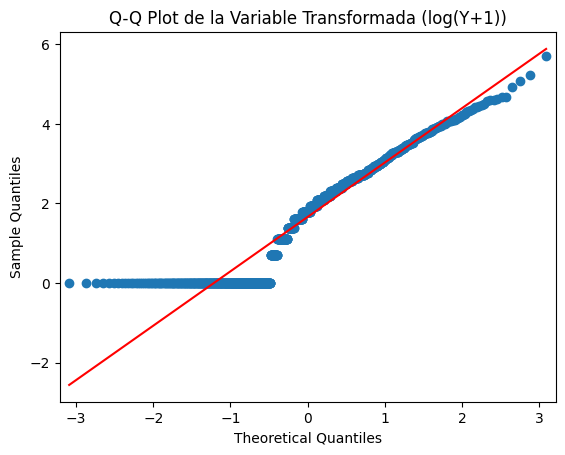

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom, shapiro, pearsonr, boxcox
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

# # Análisis de varianza (ANOVA) entre grupos de la variable dependiente
# data['Y_group'] = pd.qcut(data['Y'], q=4, duplicates='drop')
# anova_results = sm.stats.anova_lm(sm.OLS(data['Y'], sm.add_constant(pd.get_dummies(data['Y_group']))).fit())
# print('Resultados de ANOVA:')
# print(anova_results)

# Visualización de la relación entre variables explicativas y la variable dependiente
plt.figure(figsize=(10, 6))
sns.lmplot(x='X1', y='Y', data=data, aspect=1.5)
plt.title('Relación entre X1 y Y con Línea de Regresión')
plt.show()

plt.figure(figsize=(10, 6))
sns.lmplot(x='X2', y='Y', data=data, aspect=1.5)
plt.title('Relación entre X2 y Y con Línea de Regresión')
plt.show()

# Transformaciones de variables
data['log_Y'] = np.log1p(data['Y'])  # log(1 + Y) para manejar ceros
plt.figure(figsize=(10, 6))
sns.histplot(data['log_Y'], bins=30, kde=False)
plt.title('Distribución de la Variable Dependiente Transformada (log(Y+1))')
plt.xlabel('log(Y+1)')
plt.ylabel('Frecuencia')
plt.show()

# Cálculo de la dispersión
dispersion = np.var(data['Y']) / np.mean(data['Y'])
print(f'Dispersión de Y: {dispersion}')

# Análisis de autocorrelación
plot_acf(data['Y'])
plt.title('Autocorrelación de Y')
plt.show()

# Q-Q plot para normalidad de la variable transformada
qqplot(data['log_Y'], line='s')
plt.title('Q-Q Plot de la Variable Transformada (log(Y+1))')
plt.show()

In [6]:
    # Verificación de valores faltantes
missing_values = data.isnull().sum()
print('Valores faltantes en cada columna:')
print(missing_values)


Valores faltantes en cada columna:
Y        0
X1       0
X2       0
log_Y    0
dtype: int64


Asegurarse de que no haya valores faltantes en las variables de interés.

In [7]:
# Confirmar que la varianza es mayor que la media
mean_Y = np.mean(data['Y'])
var_Y = np.var(data['Y'])
print(f'Media de Y: {mean_Y}')
print(f'Varianza de Y: {var_Y}')
if var_Y > mean_Y:
    print('La varianza es mayor que la media, se cumple el supuesto para la regresión binomial negativa.')
else:
    print('Advertencia: La varianza no es mayor que la media, puede que la regresión binomial negativa no sea adecuada.')


Media de Y: 11.598
Varianza de Y: 415.37839599999995
La varianza es mayor que la media, se cumple el supuesto para la regresión binomial negativa.


Confirmar que la varianza es mayor que la media en la variable dependiente.

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


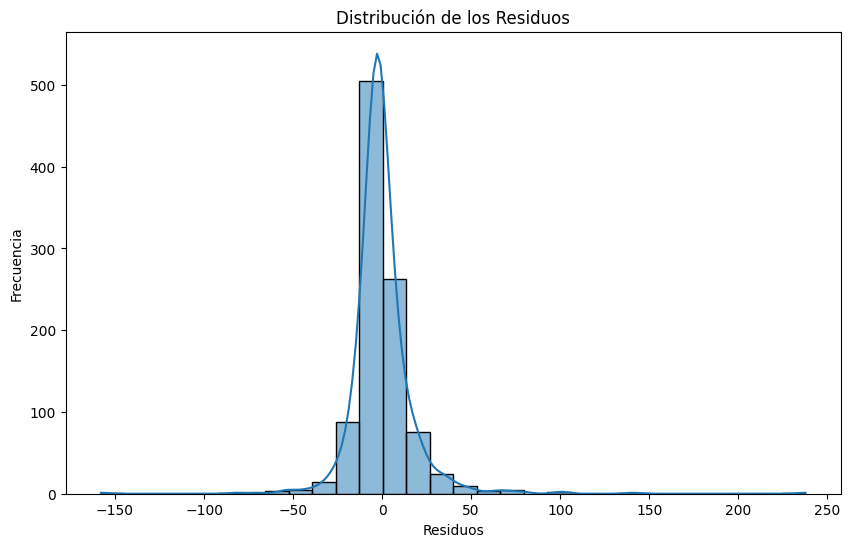

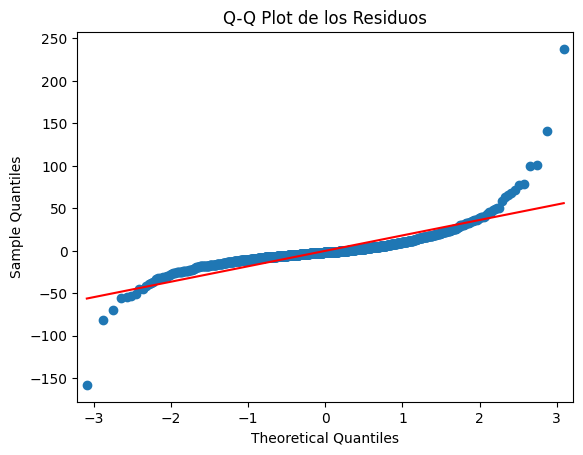

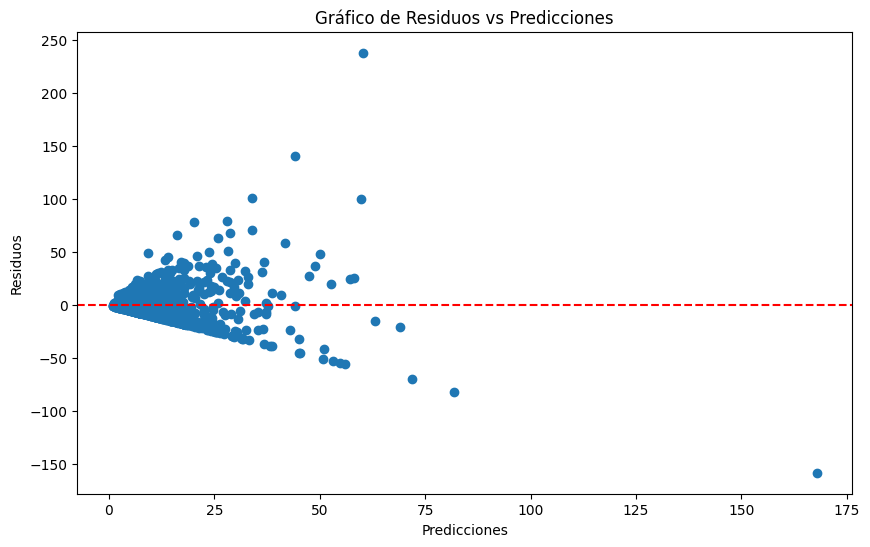

In [8]:
# Ajustar un modelo binomial negativo para obtener los residuos
import statsmodels.formula.api as smf

# Ajustar el modelo binomial negativo
model = smf.glm('Y ~ X1 + X2', data=data, family=sm.families.NegativeBinomial()).fit()
residuals = model.resid_response

# Gráfico de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Q-Q plot de los residuos
qqplot(residuals, line='s')
plt.title('Q-Q Plot de los Residuos')
plt.show()

# Gráfico de residuos vs predicciones
predictions = model.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


Visualizar la distribución de los residuos y realizar un Q-Q plot para evaluar la normalidad de los residuos.
Gráfico de residuos vs predicciones para verificar si hay patrones en los residuos.

In [12]:
dir(sm.OLS)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_kwargs_allowed',
 '_setup_score_hess',
 '_sqrt_lasso',
 'df_model',
 'df_resid',
 'endog_names',
 'exog_names',
 'fit',
 'fit_regularized',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'loglike',
 'predict',
 'score',
 'whiten']

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.discrete.count_model as h
# Ajustar el modelo de regresión binomial negativa con excesos de ceros y varianza lineal
formula = 'Y ~ X1 + X2'
model_linear = smf.zeroinfl(formula, data=data, dist='negbin')
# model_linear = h.GenericZeroInflated(formula,data=data,dist='negbin')

# Resumen del modelo
print("Modelo con varianza lineal:")
print(model_linear.summary())

TypeError: GenericZeroInflated.__init__() missing 1 required positional argument: 'exog'

In [10]:
# Ajustar el modelo de regresión binomial negativa con excesos de ceros y varianza cuadrática
formula_quadratic = 'Y ~ X1 + X2 + I(X1**2) + I(X2**2)'
model_quadratic = smf.zeroinfl(formula_quadratic, data=data, dist='negbin')

# Resumen del modelo
print("Modelo con varianza cuadrática:")
print(model_quadratic.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'zeroinfl'